In [1]:
import os
import urllib
import cv2
import tensorflow as tf
import numpy as np

from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [2]:
local_path = os.getcwd()
model_file = os.path.join(local_path, 'models', 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

if os.path.isfile(model_file) == False:
    urllib.request.urlretrieve(model_url, model_file)

In [3]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [4]:
img_path = os.path.join(local_path, 'images', 'my_image.jpg')

(1440, 1080, 3)


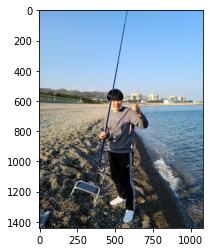

In [5]:
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

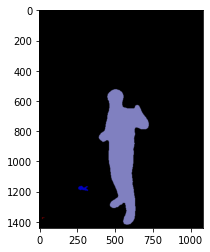

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  4,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
boat
chair
person


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]
#BGR -> RGB
seg_color = (colormap[15][2],colormap[15][1],colormap[15][0])

(1440, 1080)


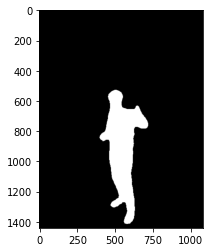

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

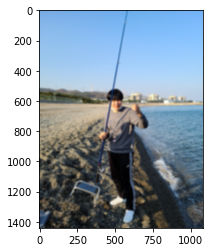

In [13]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

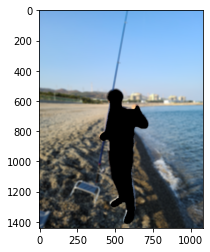

In [14]:
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

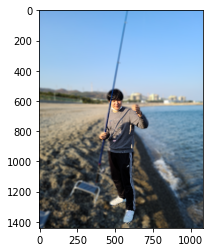

In [15]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
plt.savefig(os.path.join(local_path, 'output_images', 'output_my_image.jpg'))

<Figure size 432x288 with 0 Axes>

In [17]:
img2_path = os.path.join(local_path, 'images', 'lala_cat.jfif')

(1152, 2048, 3)


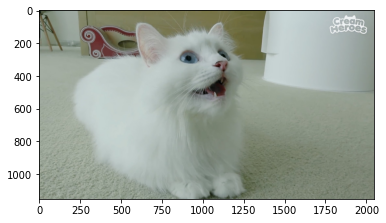

In [18]:
img2_orig = cv2.imread(img2_path) 

print(img2_orig.shape)
plt.imshow(cv2.cvtColor(img2_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
segvalues2, output2 = model.segmentAsPascalvoc(img2_path)

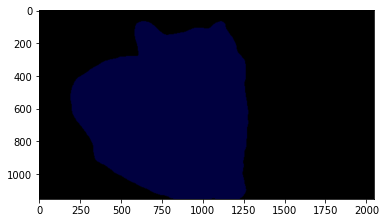

In [20]:
plt.imshow(output2)
plt.show()

In [21]:
colormap[8]
#BGR -> RGB
seg_color2 = (colormap[8][2],colormap[8][1],colormap[8][0])

(1152, 2048)


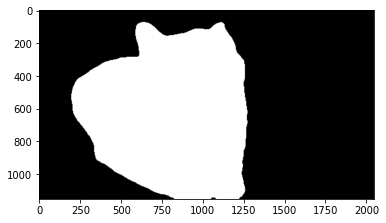

In [22]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map2 = np.all(output2==seg_color2, axis=-1)
print(seg_map2.shape)
plt.imshow(seg_map2, cmap='gray')
plt.show()

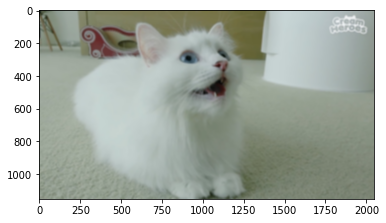

In [23]:
img_orig_blur2 = cv2.blur(img2_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

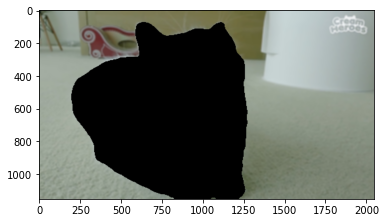

In [24]:
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

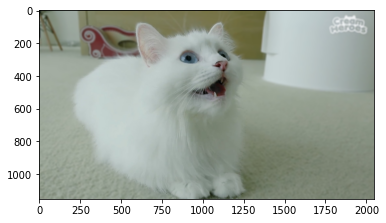

In [25]:
img_concat2 = np.where(img_mask_color2==255, img2_orig, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
plt.savefig(os.path.join(local_path, 'output_images', 'lala_cat.png'))

<Figure size 432x288 with 0 Axes>

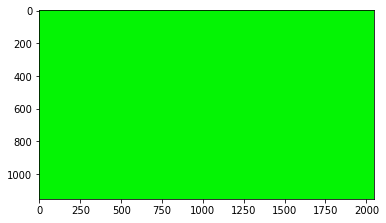

In [27]:
img_orig_Chromakey2 = np.zeros(shape=(np.shape(img2_orig)), dtype=np.uint8)
img_orig_Chromakey2[:,:,0] = 4
img_orig_Chromakey2[:,:,1] = 244
img_orig_Chromakey2[:,:,2] = 4
plt.imshow(img_orig_Chromakey2)
plt.show()

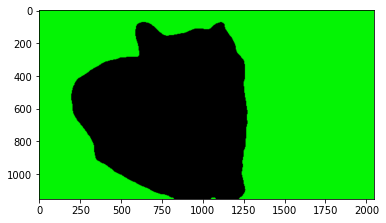

In [28]:
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_Chromakey2 = cv2.bitwise_and(img_orig_Chromakey2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_Chromakey2, cv2.COLOR_BGR2RGB))
plt.show()

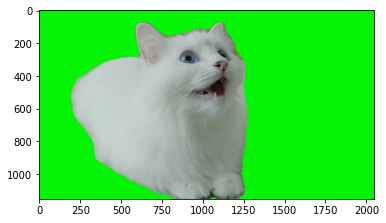

In [30]:
img_concat3 = np.where(img_mask_color2==255, img2_orig, img_bg_Chromakey2)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

## 문제점
1. line16, line26번을 보게 되면 이미지 사이즈가 432x288로 입력 이미지에 비해 작게 resize됩니다.
    -입력 이미지보다 화질이 깨집니다.
2. 정확도가 100%가 아닌 이상 제대로 누끼가 안따지게 됩니다.
3. 위에서 한 작업은 아웃포커싱이 아닌 image segemtation으로 정확히는 이미지에 있는 대상을 분류한 것입니다.

## 해결 방법
1. LMS에 있는 것처럼 3D Camera를 활용해 TOF에 따라 누끼를 따면 좀 더 좋은 이미지가 나올 것 같습니다.
2. 지금은 한 이미지만을 처리해 정확도가 떨어질 수 있지만 다양한 조리개, 망원 렌즈를 통해 여러 장의 이미지를 통해 처리한다면 좀 더 좋은 이미지가 나올 것 같습니다.

## Reference
1. https://m.blog.naver.com/typs6301/222172333739
2. https://github.com/ayoolaolafenwa/PixelLib